# An√°lise de Dados Explorat√≥ria da Popula√ß√£o Mundial

## 1. Introdu√ß√£o

    Historicamente, a popula√ß√£o mundial tem apresentado um crescimento constante. A distribui√ß√£o de popula√ß√£o ao redor do planeta tamb√©m costuma variar muito, sendo a √Åsia, hoje, o continente mais populoso do planeta.
    
    Neste estudo, exploraremos um conjunto de dados que cont√©m informa√ß√µes sobre a popula√ß√£o mundial desde a d√©cada de 1970 at√© 2022. O conjunto de dados apresenta informa√ß√µes como taxa de crescimento, densidade por km¬≤, quantidade de pessoas, o tamanho da √°rea do pa√≠s, ranking de popula√ß√£o etc.
    
    Os dados foram obtidos atrav√©s do site ‚ÄúKaggle‚Äù, disponibilizado por Hasib Al Muzdadid e atualizado h√° 6 meses.


## 1.1 Objetivos

O objetivo deste estudo √© realizar uma An√°lise e Dados Exploratora sobre a popula√ß√£o mundial utilizando o dataset disponibilizado no [kaggle](https://www.kaggle.com/code/hasibalmuzdadid/world-population-analysis). Junto a isso vamos tentar responder √†s seguintes quest√µes:

1. Quais pa√≠ses mais diminuiram de popula√ß√£o entre 1970 e 2022?
2. Quais pa√≠ses tiveram a maior taxa de crescimento desde 1970 at√© hoje?
3. Qual a distribui√ß√£o populacional nos continentes em 2022?
4. Qual √© a compara√ß√£o dos pa√≠ses mais populados de 1970 com sua rela√ß√£o nos dias de hoje?

# 2. Metodologia

Esta se√ß√£o vai representar os procedimentos de limpeza e manipula√ß√£o do dataset, este que possui as seguintes informa√ß√µes:

| Coluna                      | Descri√ß√£o                                                   |
|-----------------------------|-------------------------------------------------------------|
| Rank                        | Ranking por popula√ß√£o                                       |
| CCA3                        | C√≥digo de 3 d√≠gitos do pa√≠s                                 |
| Country                     | Nome do pa√≠s/territ√≥rio                                     |
| Capital                     | Nome da capital do pa√≠s                                     |
| Continente                  | Nome do Continente do pa√≠s                                  |
| 2022 Population             | Popula√ß√£o do Pa√≠s/Territ√≥rio no ano de 2022                 |
| 2020 Population             | Popula√ß√£o do Pa√≠s/Territ√≥rio no ano de 2020                 |
| 2015 Population             | Popula√ß√£o do Pa√≠s/Territ√≥rio no ano de 2015                 |
| 2010 Population             | Popula√ß√£o do Pa√≠s/Territ√≥rio no ano de 2010                 |
| 2000 Population             | Popula√ß√£o do Pa√≠s/Territ√≥rio no ano de 2000                 |
| 1990 Population             | Popula√ß√£o do Pa√≠s/Territ√≥rio no ano de 1990                 |
| 1980 Population             | Popula√ß√£o do Pa√≠s/Territ√≥rio no ano de 1980                 |
| 1970 Population             | Popula√ß√£o do Pa√≠s/Territ√≥rio no ano de 1970                 |
| Area (km¬≤)                  | Tamanho da √°rea do Pa√≠s/Territ√≥rio em quil√¥metros quadrados |
| Density (per km¬≤)           | Densidade da popula√ß√£o por quil√¥metro quadrado              |
| Growth Rate                 | Taxa de crescimento de popula√ß√£o por pa√≠s/territ√≥rio        |
| World Population Percentage | A porcentagem da popula√ß√£o por cada pa√≠s                    |

### 2.1 Configurando o ambiente

Aqui importaremos as bibliotecas necess√°rias

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns

## 2.2 Leitura dos Dados

In [15]:
df = pd.read_csv('world_population.csv')

## 2.3 Vis√£o Geral

In [16]:
df.head()

Rank CCA3 Country/Territory           Capital Continent  2022 Population  \
0    36  AFG       Afghanistan             Kabul      Asia         41128771   
1   138  ALB           Albania            Tirana    Europe          2842321   
2    34  DZA           Algeria           Algiers    Africa         44903225   
3   213  ASM    American Samoa         Pago Pago   Oceania            44273   
4   203  AND           Andorra  Andorra la Vella    Europe            79824   

   2020 Population  2015 Population  2010 Population  2000 Population  \
0         38972230         33753499         28189672         19542982   
1          2866849          2882481          2913399          3182021   
2         43451666         39543154         35856344         30774621   
3            46189            51368            54849            58230   
4            77700            71746            71519            66097   

   1990 Population  1980 Population  1970 Population  Area (km¬≤)  \
0         10694796         12486631         10752971      652230   
1          3295066          2941651          2324731       28748   
2         25518074         18739378         13795915     2381741   
3            47818            32886            27075         199   
4            53569            35611            19860         468   

   Density (per km¬≤)  Growth Rate  World Population Percentage  
0            63.0587       1.0257                         0.52  
1            98.8702       0.9957                         0.04  
2            18.8531       1.0164                         0.56  
3           222.4774       0.9831                         0.00  
4           170.5641       1.0100                         0.00

## 2.3 Organiza√ß√£o dos dados

## 2.3.1 Checagem de Valores nulos

In [8]:
#Soma os valores nulos de cada coluna

df.isna().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km¬≤)                     0
Density (per km¬≤)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

## 2.3.2 Remo√ß√£o de colunas

In [18]:
df.drop('CCA3', inplace=True, axis=1)

# 2.4 Feature Engineering

Algumas colunas importantes para achar a resposta para as perguntas ser√£o adicionadas √† tabela afim de facilitar o processo:

## 2.4.1 Crescimento Populacional de 1970 a 2022

In [56]:
#Crescimento de popula√ß√£o entre 1970 e 2022
df['Population Increase 1970-2022'] = df['2022 Population'] - df['1970 Population']
# Top 5 paises com maior crescimento
top5_growth = df.nlargest(5, 'Population Increase 1970-2022')

## 2.4.2 Perda de popula√ß√£o entre 1970 e 2022

In [54]:
# Calcular perda de popula√ß√£o
df['Population Loss'] = df['1970 Population'] - df['2022 Population']
# Top 5 pa√≠ses com maior perda de popula√ß√£o
top5_loss = df.nlargest(5, 'Population Loss')

# 3. An√°lise de dados

# 3.1 Quais pa√≠ses mais diminu√≠ram de popula√ß√£o entre 1970 e 2022?

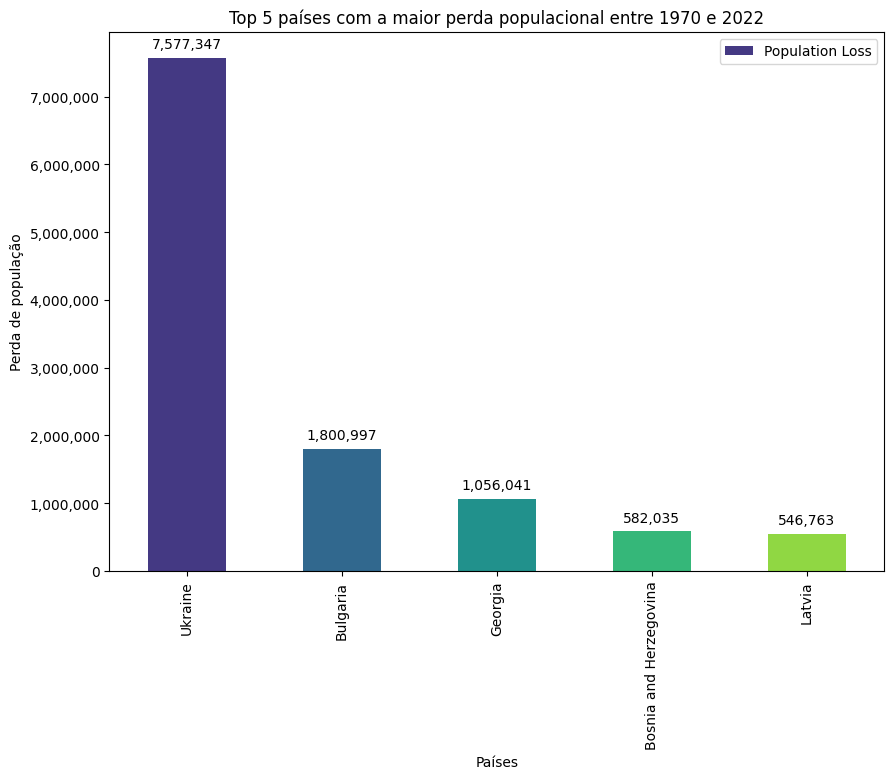

In [55]:
# Plotando o gr√°fico
ax = top5_loss.plot(kind='bar', x='Country/Territory', y='Population Loss', figsize=(10,7), color=sns.color_palette("viridis", 5))
plt.title('Top 5 pa√≠ses com a maior perda populacional entre 1970 e 2022')
plt.ylabel('Perda de popula√ß√£o')
plt.xlabel('Pa√≠ses')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Anotar com os valores exatos
for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

## 3.2 Quais pa√≠ses tiveram a maior taxa de crescimento desde 1970 at√© hoje?

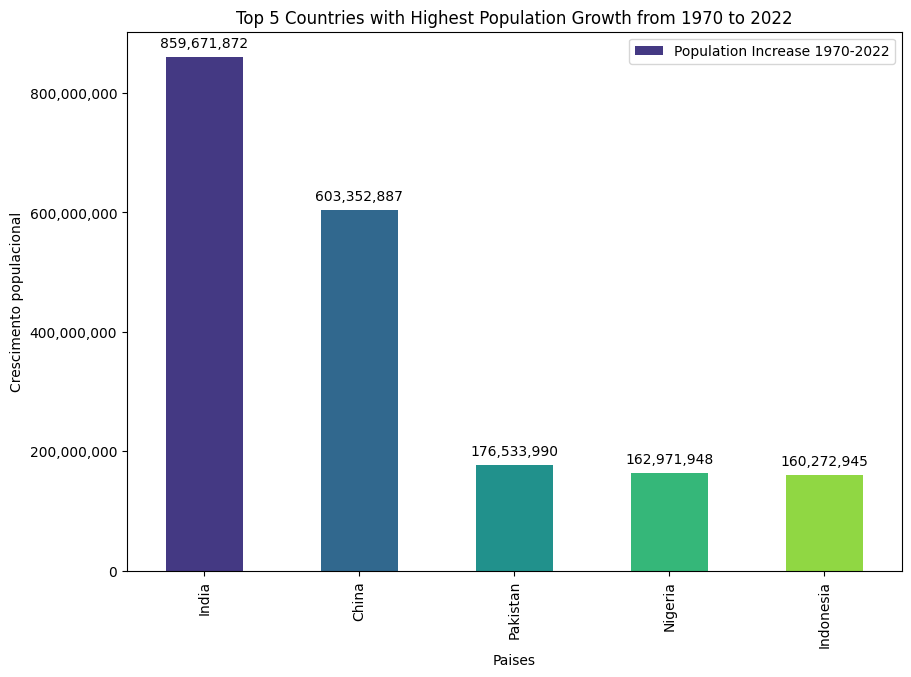

In [57]:
# Plotando o gr√°fico
ax = top5_growth.plot(kind='bar', x='Country/Territory', y='Population Increase 1970-2022', figsize=(10,7), color=sns.color_palette("viridis", 5))
plt.title('Top 5 Countries with Highest Population Growth from 1970 to 2022')
plt.ylabel('Crescimento populacional')
plt.xlabel('Paises')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Pegando valores exatos
for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

## 3.3 Qual a distribui√ß√£o populacional nos continentes em 2022?

In [38]:
# Calculando a popula√ß√£o total por continente
continent_population_2022 = df.groupby('Continent')['2022 Population'].sum()

# Plottando o gr√°fico
plt.figure(figsize=(10, 8))
plt.pie(continent_population_2022, labels=continent_population_2022.index, autopct='%1.1f%%', startangle=140)
plt.title('Popula√ß√£o de 2022 por continente')
plt.show()

## 3.4 Qual √© a compara√ß√£o dos pa√≠ses mais populados de 1970 com sua rela√ß√£o nos dias de hoje?

In [53]:
# Pegar os 5 paises mais populados em 1970
top5_1970 = df.nlargest(5, '1970 Population')

# Filtrando as popula√ß√µes de 2022 desses pa√≠ses
top5_1970_2022 = top5_1970[['Country/Territory', '1970 Population', '2022 Population']]

# Plotando o gr√°fico
ax = top5_1970_2022.plot(kind='bar', x='Country/Territory', y=['1970 Population', '2022 Population'], figsize=(10,7), color=sns.color_palette("viridis", 2))
plt.title('Top 5 pa√≠ses com mais popula√ß√£o em 1970 e sua compara√ß√£o em 2022')
plt.ylabel('Popula√ß√£o')
plt.xlabel('Pa√≠ses')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Anotando com os valores exatos
for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

# 4. An√°lise e Consolida√ß√£o

Nossa an√°lise abrangente dos dados populacionais globais, abrangendo de 1970 a 2022, revelou uma s√©rie de padr√µes e tend√™ncias not√°veis. A popula√ß√£o mundial aumentou significativamente nesse per√≠odo, com algumas na√ß√µes exibindo taxas de crescimento populacional extraordin√°rias, enquanto outras testemunharam uma queda.

Ao observar as cinco na√ß√µes que sofreram as maiores perdas populacionais de 1970 a 2022, a Ucr√¢nia emergiu como o pa√≠s com a maior diminui√ß√£o, seguido pela Bulg√°ria, Ge√≥rgia, B√≥snia e Herzegovina e Let√¥nia. Essa queda na popula√ß√£o pode estar ligada a uma s√©rie de fatores, incluindo, mas n√£o se limitando a, emigra√ß√£o, diminui√ß√£o da taxa de natalidade, efeitos de conflitos passados e atuais, entre outros. Cada caso oferece um rico terreno para futuras investiga√ß√µes e an√°lises.

Por outro lado, √çndia, China, Paquist√£o, Nig√©ria e Indon√©sia emergiram como os pa√≠ses com o maior crescimento populacional de 1970 a 2022. A √çndia e a China, em particular, mostraram um aumento surpreendente, com a √çndia adicionando mais de 859 milh√µes √† sua popula√ß√£o e a China mais de 603 milh√µes durante esse per√≠odo. Estes aumentos sem precedentes na popula√ß√£o podem ser atribu√≠dos a diversos fatores, incluindo pol√≠ticas governamentais, melhorias nos cuidados de sa√∫de, efeitos da revolu√ß√£o verde na agricultura, entre outros.

Tamb√©m foi relevante analisar a distribui√ß√£o da popula√ß√£o entre os continentes. A √Åsia √© de longe o continente mais populoso, abrigando quase 60% da popula√ß√£o mundial em 2022, seguido pela √Åfrica, Europa, Am√©rica do Norte, Am√©rica do Sul e Oceania. Essa distribui√ß√£o mostra uma clara concentra√ß√£o populacional na √Åsia, o que tem implica√ß√µes significativas para quest√µes de pol√≠ticas globais, como desenvolvimento econ√¥mico, seguran√ßa alimentar e mudan√ßas clim√°ticas.

Adicionalmente, examinamos as na√ß√µes mais populosas em 1970 e comparamos suas popula√ß√µes com as de 2022. Notavelmente, a China e a √çndia, que lideravam em 1970, mantiveram suas posi√ß√µes em 2022, apesar do aumento significativo na popula√ß√£o em ambos os pa√≠ses. Os Estados Unidos, R√∫ssia e Indon√©sia completaram os cinco primeiros, cada um com um aumento consider√°vel na popula√ß√£o.

Apesar dos insights valiosos gerados por nossa an√°lise, √© importante considerar as limita√ß√µes. A precis√£o das estimativas populacionais pode ser afetada por v√°rios fatores, incluindo a qualidade dos censos e dos sistemas de registro, bem como a ocorr√™ncia de conflitos, desastres naturais e outras crises que podem causar movimentos populacionais significativos. Al√©m disso, nossa an√°lise n√£o considerou varia√ß√µes intra-regionais dentro dos pa√≠ses, o que poderia revelar padr√µes populacionais mais complexos.

No futuro, recomendamos estudos adicionais para explorar as causas subjacentes das tend√™ncias observadas, bem como suas implica√ß√µes para quest√µes como desenvolvimento, seguran√ßa e sustentabilidade. Al√©m disso, a an√°lise de subgrupos dentro dos pa√≠ses - por exemplo, por idade, g√™nero ou status socioecon√¥mico - pode fornecer insights adicionais sobre a din√¢mica populacional.

# 5. Conclus√£o

No in√≠cio da se√ß√£o de conclus√£o, rememoramos os objetivos da nossa an√°lise, proporcionando um contexto para as conclus√µes apresentadas. Entre as principais conclus√µes, destaca-se a ascens√£o r√°pida da popula√ß√£o na √çndia, a diminui√ß√£o na Ucr√¢nia e a proemin√™ncia demogr√°fica da √Åsia. Estas conclus√µes estabelecem uma conex√£o com as perguntas de pesquisa inicialmente propostas e ilustram como os dados foram utilizados para proporcionar respostas a estas quest√µes.

√â v√°lido ressaltar que, apesar das limita√ß√µes e potenciais vieses na an√°lise, as conclus√µes obtidas possuem relev√¢ncia e proporcionam insights valiosos sobre a demografia global. As tend√™ncias identificadas podem influenciar decis√µes e processos em diversas √°reas, desde a pol√≠tica at√© a economia.

A partir desses resultados, sugerimos como recomenda√ß√£o a realiza√ß√£o de an√°lises mais detalhadas de subgrupos demogr√°ficos, visando um entendimento mais completo das tend√™ncias globais. Finalizamos refor√ßando a import√¢ncia do estudo da demografia para a compreens√£o do nosso mundo em constante mudan√ßa, e a contribui√ß√£o do nosso trabalho para tal.

# 6. Refer√™ncias

[üë®‚Äçüë©‚Äçüëß‚Äçüë¶World Population „ÄΩÔ∏èAnalysis](https://www.kaggle.com/code/hasibalmuzdadid/world-population-analysis)